In [78]:
import pandas as pd
import statistics
import numpy as np
import seaborn as sns
from pathlib import Path

In [79]:
path = "../datasets/the-movie-datasets"
path = Path(path)

files = list(path.glob('*'))
print("Files found:")
for i, file in enumerate(files):
    print(f"{i}. {file.name}")

Files found:
0. links_small.csv
1. links.csv
2. credits.csv
3. movies_metadata.csv
4. ratings.csv
5. ratings_small.csv
6. keywords.csv


In [80]:
df_meta_data = pd.read_csv(files[3])
print(df_meta_data.columns)
df_meta = df_meta_data.filter(['id','original_title','genres','budget','revenue','vote_average','vote_count'])

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


/var/folders/7_/6rnw1yrs7p923fzd_64549v00000gn/T/ipykernel_77856/2652762781.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta_data = pd.read_csv(files[3])


In [81]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              45466 non-null  object 
 1   original_title  45466 non-null  object 
 2   genres          45466 non-null  object 
 3   budget          45466 non-null  object 
 4   revenue         45460 non-null  float64
 5   vote_average    45460 non-null  float64
 6   vote_count      45460 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.4+ MB


In [82]:
df_meta.genres = df_meta.genres.apply(eval).apply(lambda x: [genre['name'] for genre in x] if x else pd.NA)
df_meta.genres.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45466 entries, 0 to 45465
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
43024 non-null  object
dtypes: object(1)
memory usage: 355.3+ KB


In [83]:
df_meta.genres

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                            <NA>
45465                            <NA>
Name: genres, Length: 45466, dtype: object

In [84]:
df_meta = df_meta.dropna(subset=['genres'])
df_meta.genres.info()

<class 'pandas.core.series.Series'>
Index: 43024 entries, 0 to 45463
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
43024 non-null  object
dtypes: object(1)
memory usage: 672.2+ KB


In [85]:
genres = df_meta.genres.apply(lambda x: x[0]).unique()
genres,genres.shape

(array(['Animation', 'Adventure', 'Romance', 'Comedy', 'Action', 'Family',
        'History', 'Drama', 'Crime', 'Fantasy', 'Science Fiction',
        'Thriller', 'Music', 'Horror', 'Documentary', 'Mystery', 'Western',
        'TV Movie', 'War', 'Foreign', 'Carousel Productions', 'Aniplex',
        'Odyssey Media'], dtype=object),
 (23,))

In [86]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43024 entries, 0 to 45463
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              43024 non-null  object 
 1   original_title  43024 non-null  object 
 2   genres          43024 non-null  object 
 3   budget          43024 non-null  object 
 4   revenue         43018 non-null  float64
 5   vote_average    43018 non-null  float64
 6   vote_count      43018 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.6+ MB


In [87]:
df_meta[df_meta.revenue.isnull()]




,id,original_title,genres,budget,revenue,vote_average,vote_count
19729,82663,Midnight Man,"[Action, Thriller, Drama]",0,NaN,NaN,NaN
19730,1997-08-20,"[{'iso_639_1': 'en', 'name': 'English'}]","[Carousel Productions, Vision View Entertainme...",/ff9qCepilowshEtG2GYWwzt2bs4.jpg,NaN,NaN,NaN
29502,122662,マルドゥック・スクランブル 排気,"[Animation, Science Fiction]",0,NaN,NaN,NaN
29503,2012-09-29,"[{'iso_639_1': 'ja', 'name': '日本語'}]","[Aniplex, GoHands, BROSTA TV, Mardock Scramble...",/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,NaN,NaN,NaN
35586,249260,Avalanche Sharks,"[TV Movie, Action, Horror, Science Fiction]",0,NaN,NaN,NaN
35587,2014-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]","[Odyssey Media, Pulser Productions, Rogue Stat...",/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,NaN,NaN,NaN


In [88]:
df_meta = df_meta.dropna(subset=['revenue', 'vote_average', 'vote_count'])

In [89]:
df_meta.budget = df_meta.budget.astype('float64')
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43018 entries, 0 to 45463
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              43018 non-null  object 
 1   original_title  43018 non-null  object 
 2   genres          43018 non-null  object 
 3   budget          43018 non-null  float64
 4   revenue         43018 non-null  float64
 5   vote_average    43018 non-null  float64
 6   vote_count      43018 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.6+ MB


In [90]:
df_meta = df_meta.drop(df_meta[(df_meta.budget == 0) | (df_meta.revenue == 0) | (df_meta.vote_average == 0) | (df_meta.vote_count == 0)].index)

In [91]:
df_meta.set_index('id',inplace=True)
df_meta

,original_title,genres,budget,revenue,vote_average,vote_count
id,,,,,,
862,Toy Story,"[Animation, Comedy, Family]",30000000.0,373554033.0,7.7,5415.0
8844,Jumanji,"[Adventure, Fantasy, Family]",65000000.0,262797249.0,6.9,2413.0
31357,Waiting to Exhale,"[Comedy, Drama, Romance]",16000000.0,81452156.0,6.1,34.0
949,Heat,"[Action, Crime, Drama, Thriller]",60000000.0,187436818.0,7.7,1886.0
9091,Sudden Death,"[Action, Adventure, Thriller]",35000000.0,64350171.0,5.5,174.0
...,...,...,...,...,...,...
24049,சிவாஜி,"[Action, Comedy, Drama]",12000000.0,19000000.0,6.9,25.0
280422,Все и сразу,"[Crime, Comedy]",750000.0,3.0,6.0,4.0
62757,Dikari,"[Comedy, Drama]",800000.0,1328612.0,5.8,6.0


In [92]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5364 entries, 862 to 63898
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  5364 non-null   object 
 1   genres          5364 non-null   object 
 2   budget          5364 non-null   float64
 3   revenue         5364 non-null   float64
 4   vote_average    5364 non-null   float64
 5   vote_count      5364 non-null   float64
dtypes: float64(4), object(2)
memory usage: 293.3+ KB


In [93]:
df_meta[df_meta.genres.apply(lambda x: len(x) == 0)]

,original_title,genres,budget,revenue,vote_average,vote_count
id,,,,,,


In [94]:
df_meta[(df_meta.budget == 0) | (df_meta.revenue == 0) | (df_meta.vote_average == 0) | (df_meta.vote_count == 0)]

,original_title,genres,budget,revenue,vote_average,vote_count
id,,,,,,


In [95]:
# Remove special characters from titles while keeping non-English letters
df_meta['original_title'] = df_meta['original_title'].str.replace(r'[^a-zA-Z0-9\s\u0080-\uFFFF]', '', regex=True).str.lower()

In [96]:
df_meta

,original_title,genres,budget,revenue,vote_average,vote_count
id,,,,,,
862,toy story,"[Animation, Comedy, Family]",30000000.0,373554033.0,7.7,5415.0
8844,jumanji,"[Adventure, Fantasy, Family]",65000000.0,262797249.0,6.9,2413.0
31357,waiting to exhale,"[Comedy, Drama, Romance]",16000000.0,81452156.0,6.1,34.0
949,heat,"[Action, Crime, Drama, Thriller]",60000000.0,187436818.0,7.7,1886.0
9091,sudden death,"[Action, Adventure, Thriller]",35000000.0,64350171.0,5.5,174.0
...,...,...,...,...,...,...
24049,சிவாஜி,"[Action, Comedy, Drama]",12000000.0,19000000.0,6.9,25.0
280422,все и сразу,"[Crime, Comedy]",750000.0,3.0,6.0,4.0
62757,dikari,"[Comedy, Drama]",800000.0,1328612.0,5.8,6.0


In [97]:
df_meta.explode('genres')

,original_title,genres,budget,revenue,vote_average,vote_count
id,,,,,,
862,toy story,Animation,30000000.0,373554033.0,7.7,5415.0
862,toy story,Comedy,30000000.0,373554033.0,7.7,5415.0
862,toy story,Family,30000000.0,373554033.0,7.7,5415.0
8844,jumanji,Adventure,65000000.0,262797249.0,6.9,2413.0
8844,jumanji,Fantasy,65000000.0,262797249.0,6.9,2413.0
...,...,...,...,...,...,...
63281,про любоff,Drama,2000000.0,1268793.0,4.0,3.0
63898,антидурь,Action,5000000.0,1413000.0,1.0,1.0
63898,антидурь,Comedy,5000000.0,1413000.0,1.0,1.0


In [99]:
genres = df_meta.genres.apply(lambda x: x[0]).unique()
genres,genres.shape

(array(['Animation', 'Adventure', 'Comedy', 'Action', 'History', 'Drama',
        'Crime', 'Fantasy', 'Science Fiction', 'Horror', 'Romance',
        'Mystery', 'Thriller', 'Documentary', 'Family', 'War', 'Western',
        'Music', 'TV Movie', 'Foreign'], dtype=object),
 (20,))

In [102]:
import matplotlib.pyplot as plt

def plot_avg_budget_revenue(df_x):
    # Explode the genres list to create separate rows for each genre
    df_exploded = df_x.explode('genres')

    # Calculate mean budget and revenue for each genre
    genre_stats = df_exploded.groupby('genres').agg({
        'budget': 'mean',
        'revenue': 'mean'
    }).reset_index()

    # Create a bar plot
    plt.figure(figsize=(10, 4))
    x = np.arange(len(genre_stats))
    width = 0.35

    plt.bar(x - width/2, genre_stats['budget'], width, label='Budget', color='skyblue')
    plt.bar(x + width/2, genre_stats['revenue'], width, label='Revenue', color='lightgreen')

    plt.xlabel('Genres')
    plt.ylabel('Amount ($)')
    plt.title('Average Budget vs Revenue by Genre')
    plt.xticks(x, genre_stats['genres'], rotation=45, ha='right')
    plt.legend()

    # Format y-axis to millions
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}M' if x >= 1e6 else f'${x:,.0f}'))

    plt.tight_layout()
    plt.show()


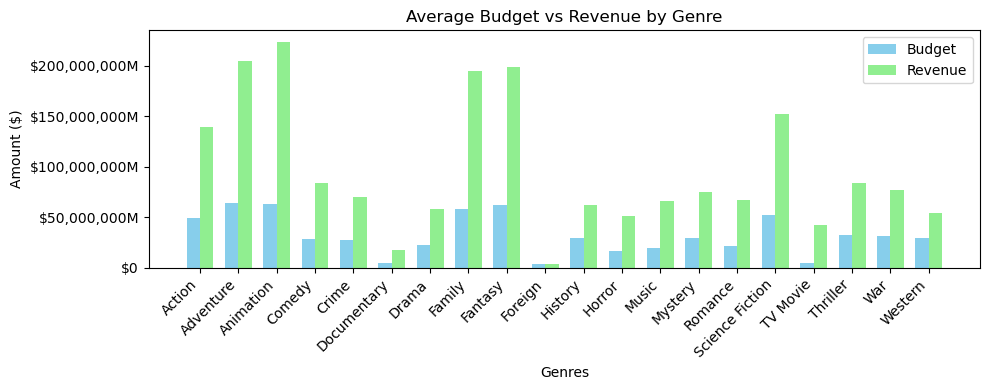

In [103]:
plot_avg_budget_revenue(df_meta)

In [151]:
# Demonstrate Central Limit Theorem by plotting distribution of sample means
n_bootstraps = 1000  # Increase number of samples for better demonstration
sample_size = 500    # Size of each sample
budget_means = []
revenue_means = []

# Generate multiple sample means
for i in range(n_bootstraps):
    # Take random sample and calculate mean budget and revenue for each genre
    sample = df_meta.sample(n=sample_size, replace=True)
    sample_means_budget = sample.explode('genres').groupby('genres')['budget'].mean()
    sample_means_revenue = sample.explode('genres').groupby('genres')['revenue'].mean()
    budget_means.append(sample_means_budget)
    revenue_means.append(sample_means_revenue)

# Convert lists to DataFrames
budget_means_df = pd.DataFrame(budget_means)
revenue_means_df = pd.DataFrame(revenue_means)




In [152]:
budget_means_df.fillna(0,inplace=True)
revenue_means_df.fillna(0,inplace=True)

In [157]:
def plot_samples_genre_mean(df_meta,budget_means_df, revenue_means_df):
    # Calculate number of plots needed
    n_genres = len(budget_means_df.columns)
    n_plots = (n_genres + 4) // 5  # Round up to nearest multiple of 5
    
    # Get actual means from original df_meta for comparison
    actual_means = df_meta.explode('genres').groupby('genres').agg({
        'budget': 'mean',
        'revenue': 'mean'
    })
    
    # Plot histograms of sample means for each genre in groups of 5
    for i in range(n_plots):
        start_idx = i * 5
        end_idx = min(start_idx + 5, n_genres)
        
        fig, axes = plt.subplots(1, end_idx - start_idx, figsize=(20, 5))
        if end_idx - start_idx == 1:
            axes = [axes]  # Make axes iterable when only one subplot
            
        for idx, genre in enumerate(budget_means_df.columns[start_idx:end_idx]):
            # Budget histogram
            axes[idx].hist(budget_means_df[genre].dropna(), bins=30, density=True, alpha=0.5, color='skyblue', label='Sample Budget Distribution')
            axes[idx].axvline(actual_means.loc[genre, 'budget'], color='blue', linestyle='--', label='Actual Budget Mean')
            
            # Revenue histogram
            axes[idx].hist(revenue_means_df[genre].dropna(), bins=30, density=True, alpha=0.5, color='lightgreen', label='Sample Revenue Distribution')
            axes[idx].axvline(actual_means.loc[genre, 'revenue'], color='green', linestyle='--', label='Actual Revenue Mean')
            
            axes[idx].set_title(f'{genre}\nSample Mean Budget=${budget_means_df[genre].mean():,.0f}\n'
                               f'Sample Mean Revenue=${revenue_means_df[genre].mean():,.0f}\n'
                               f'Actual Mean Budget=${actual_means.loc[genre,"budget"]:,.0f}\n'
                               f'Actual Mean Revenue=${actual_means.loc[genre,"revenue"]:,.0f}')
            axes[idx].set_xlabel('Amount ($)')
            axes[idx].set_ylabel('Density')
            axes[idx].legend()
        
        plt.tight_layout()
        plt.show()
        

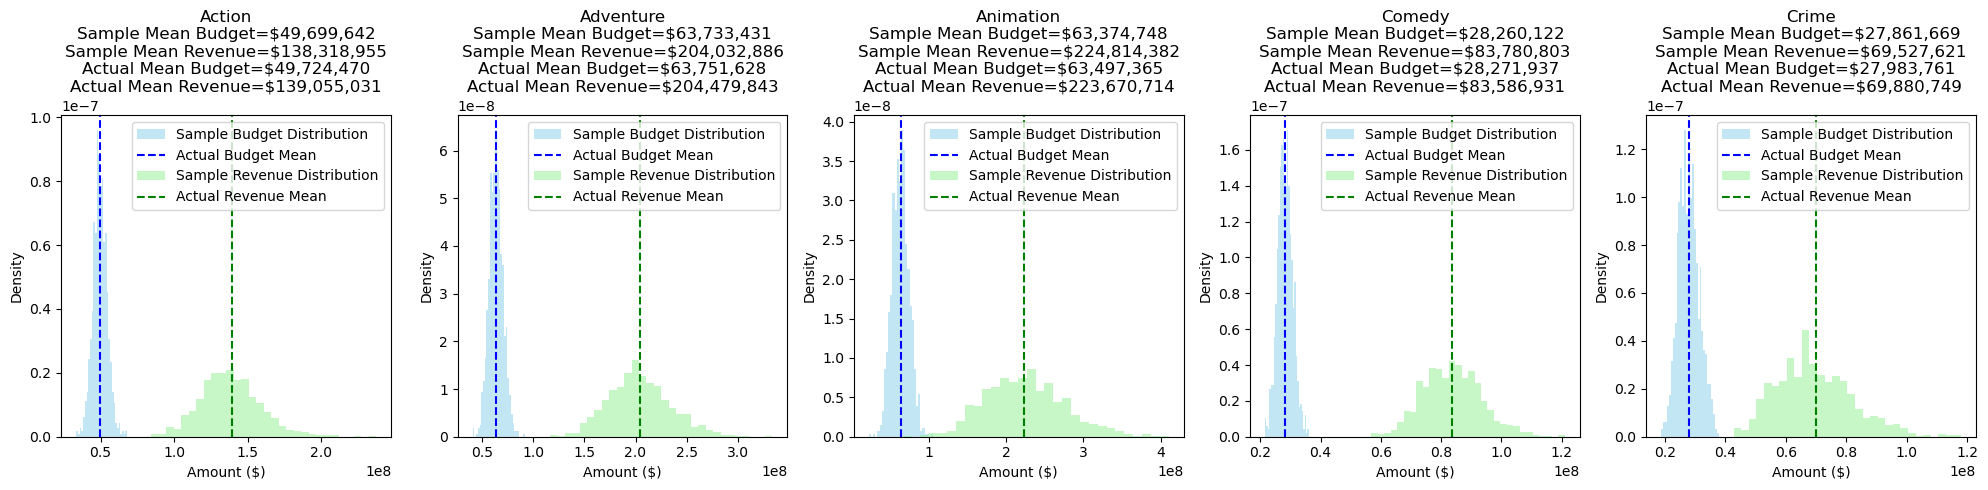

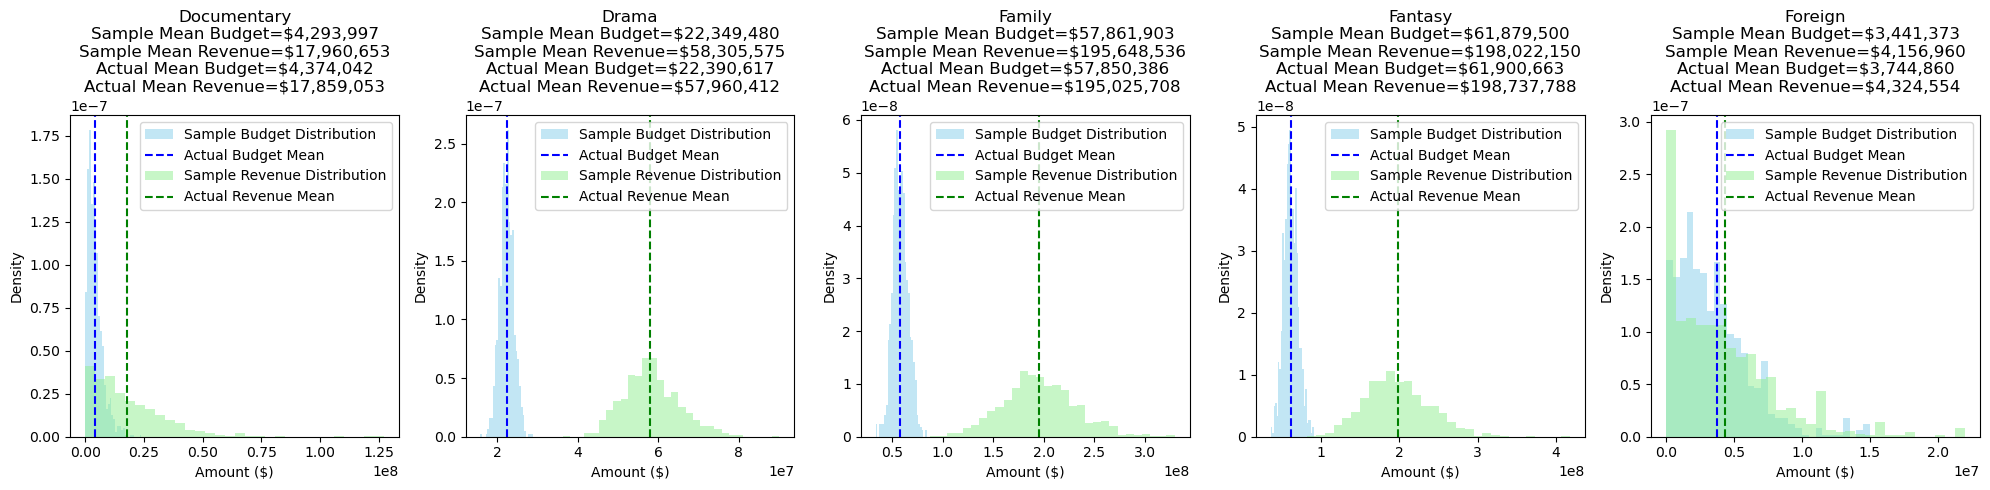

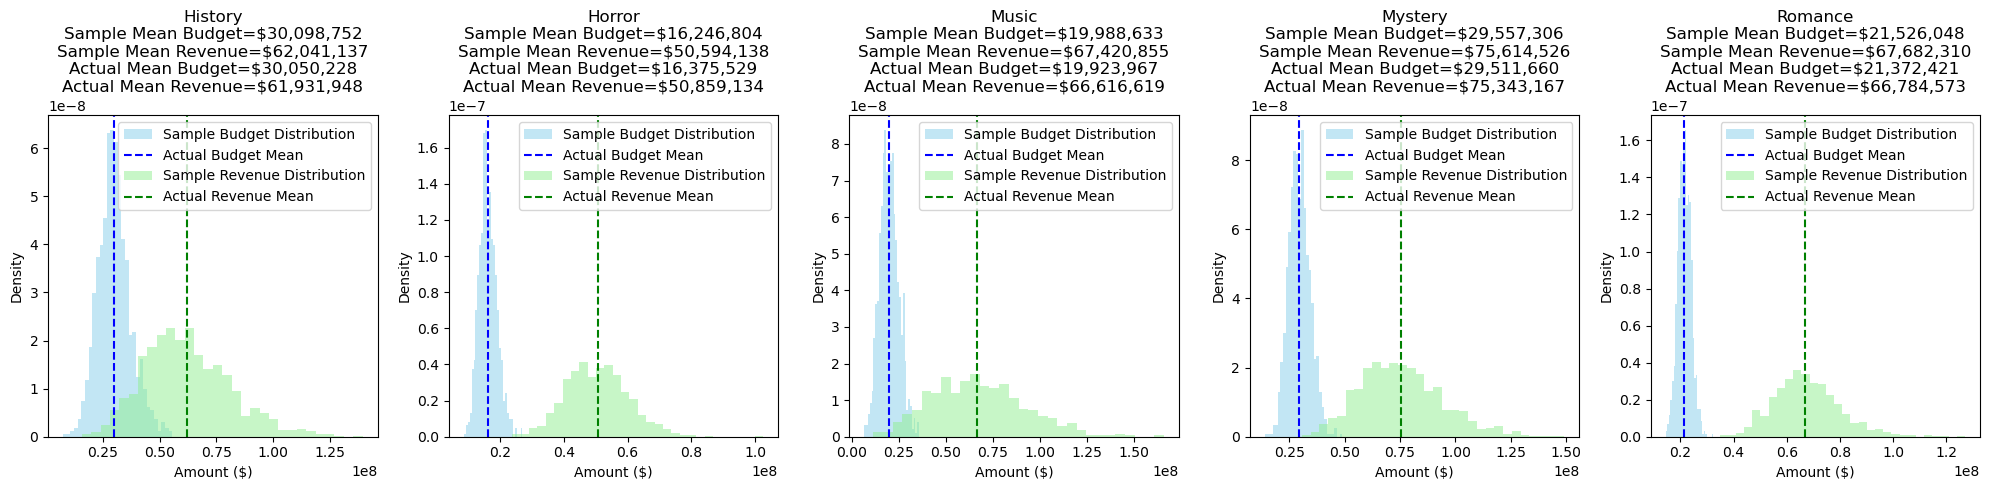

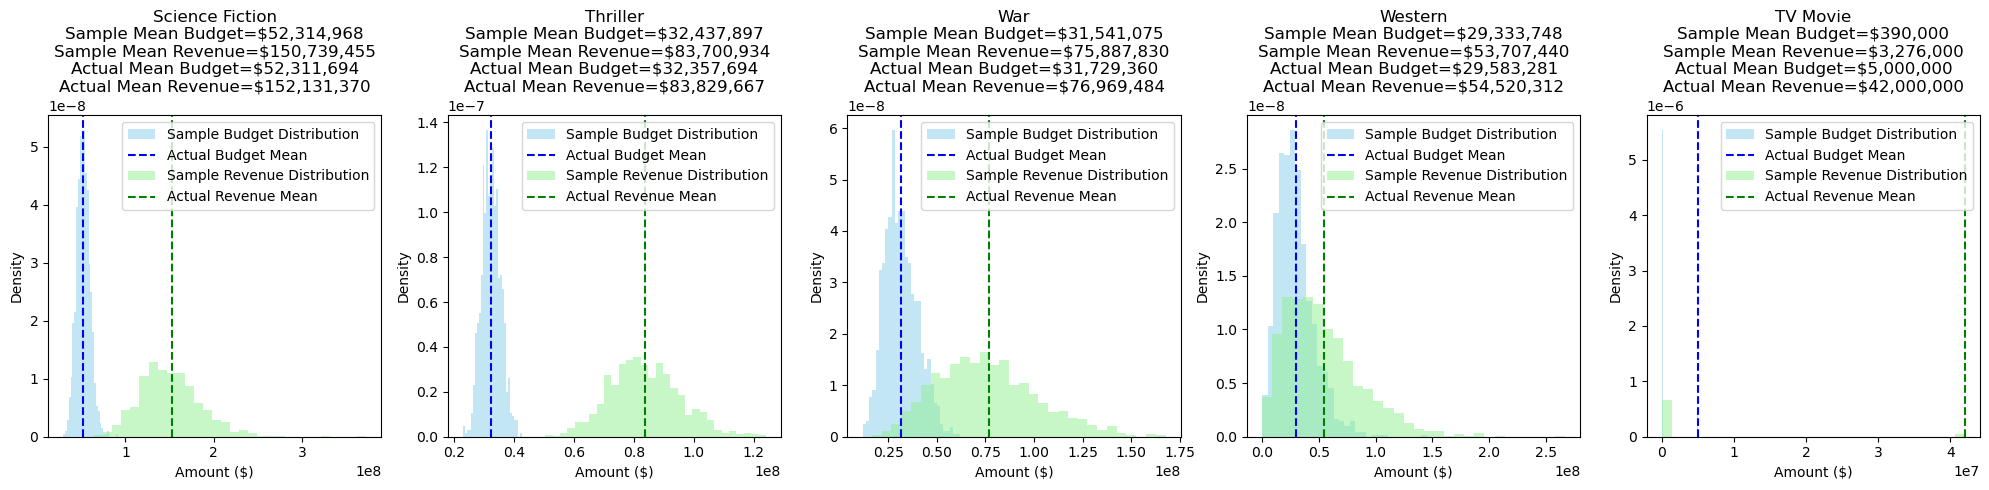

In [158]:
plot_samples_genre_mean(df_meta,budget_means_df,revenue_means_df)
